In [12]:
# Abaikan kode berikut
from IPython.display import Image

# Chapter 2 - Masking, Drawing dan Color Space

# Chapter 2.1 - Masking

Masking adalah teknik untuk menampilkan bagian tertentu dari citra, dan menghilangkan bagian lainnya.

Bagian yang ditampilkan biasanya adalah foreground, dan bagian yang tidak ditampilkan adalah background

Dimana foreground adalah bagian yang menjadi objek dari aplikasi computer vision kita, dan background adalah sisanya

Misalkan untuk kasus menentukan bola didalam citra, maka piksel-piksel bola adalah foreground, dan sisanya adalah background (Termasuk robot, gawang dll diluar bola)

Untuk kasus menentukan gawang, maka semua piksel gawang adalah foreground, dan sisanya adalah background (Termasuk bola dll)

Perhatikan bahwa tergantung object of interest kita, foreground berubah. Hal ini mengakibatkan 1 frame gambar diproses berkali-kali, misalnya pertama bola dianggap foreground, lalu selanjutnya gawang dianggap foreground, selanjutnya robot dianggap foreground dan seterusnya.

Masking tidak akan kita lakukan secara manual di aplikasi computer vision, melainkan dilakukan dengan bantuan library `opencv`, tapi mengerti cara kerja masking akan sangat membantu dalam mempelajari citra

In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
# Lokasi dari kedua file yang akan dijadikan contoh
img_path = "./sample/robot_ball.jpg" 
mask_path = "./sample/mask_robot_ball.jpg"

In [7]:
# Load kedua gambar, gambar asal, dan gambar yang kaan menjadi mask
img = cv2.imread(img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_GRAYSCALE berfungsi untuk menganggap gambar yang dibaca sebagai grayscale

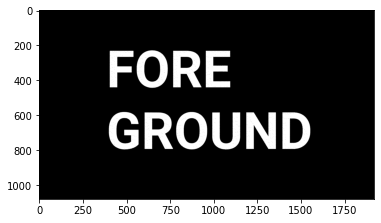

In [8]:
plt.imshow(mask, cmap="gray") # cmap (Color Map) adalah bagaimana kita memapping angka menjadi warna, gray berarti 0 -> Gelap, 255 -> Putih

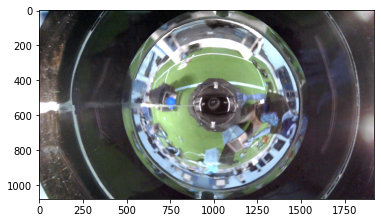

In [9]:
plt.imshow(img)

Masking yang akan kita lakukan adalah operasi AND, yang mana mungkin sudah pernah kalian dengar dengan _truth table_ seperti berikut

| A | B | Result |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

Logika masking dapat dibayangkan sebagai berikut: 
1. Apabila piksel di mask berwarna hitam, piksel di gambar hasil adalah hitam
2. Apabila piksel di mask berwarna putih, piksel di gambar hasil adalah piksel dari gambar asal

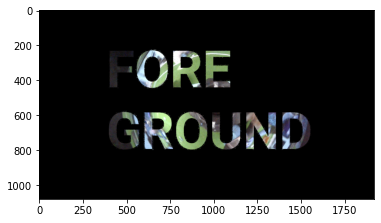

In [10]:
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked)

Fungsi `bitwise_and` memerlukan 3 buah parameter, yaitu variabel yang akan menyimpan gambar hasil, gambar asal, dan mask

Perhatikan bahwa kita akan menyimpan gambar asal dan gambar setelah pemrosesan di variabel yang sama

### Contoh Fungsi
Ada banyak penggunaan dari masking, contoh paling sederhana adalah sebagai berikut

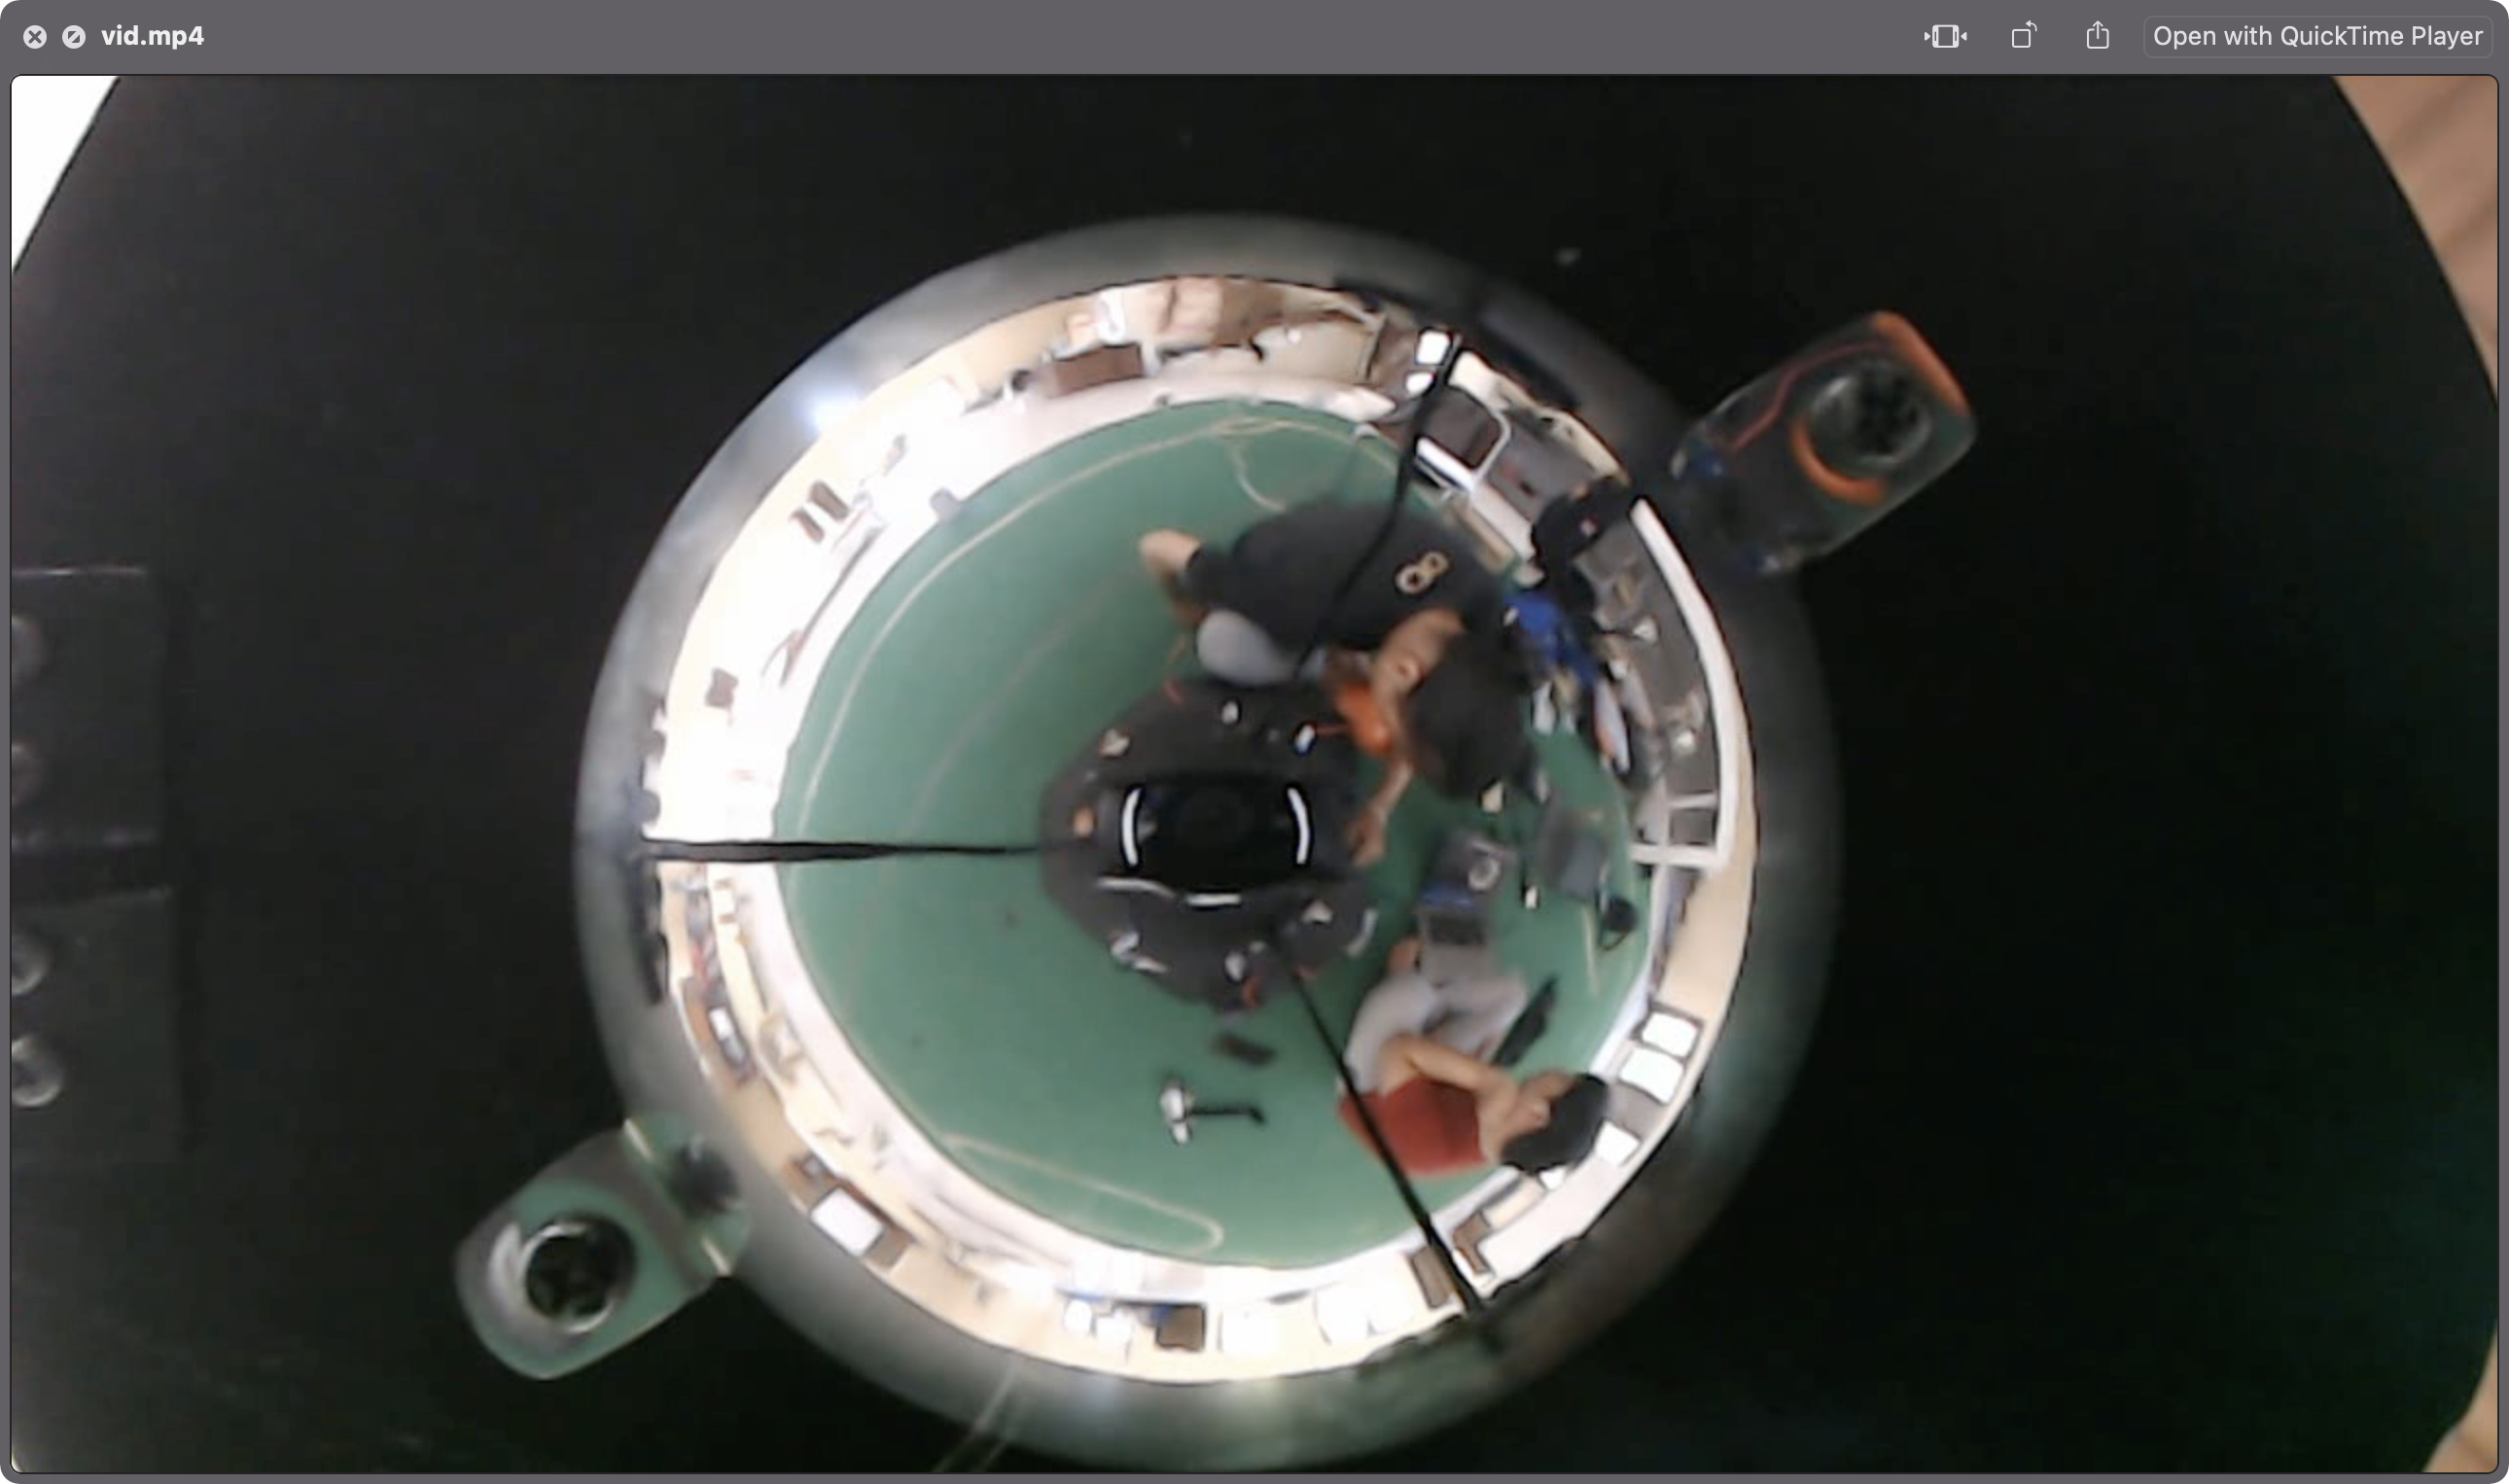

In [13]:
Image("assets/example_vid_frame.png")

Perhatikan bahwa hanya sebagian kecil dari citra yang bermanfaat untuk aplikasi kita (Lingkaran ditengah), sedangkan bagian diluar lingkaran tersebut tidaklah berguna untuk aplikasi kita

Dilihat dari citra diatas hanya kurang 40% dari citra berguna untuk aplikasi, sedangkan 60% sisanya hanyalah noise

Noise tersebut perlu dihilangkan dengan tujuan utama mengurangi pemrosesan yang perlu dilakukan dari aplikasi, misal waktu yang diperlukan untuk memproses 1 frame adalah 10ms, jika kita dapat mengabaikan bagian tidak penting dari gambar kita dapat mengurangi waktu pemrosesan menjadi 4ms saja (60% reduction)

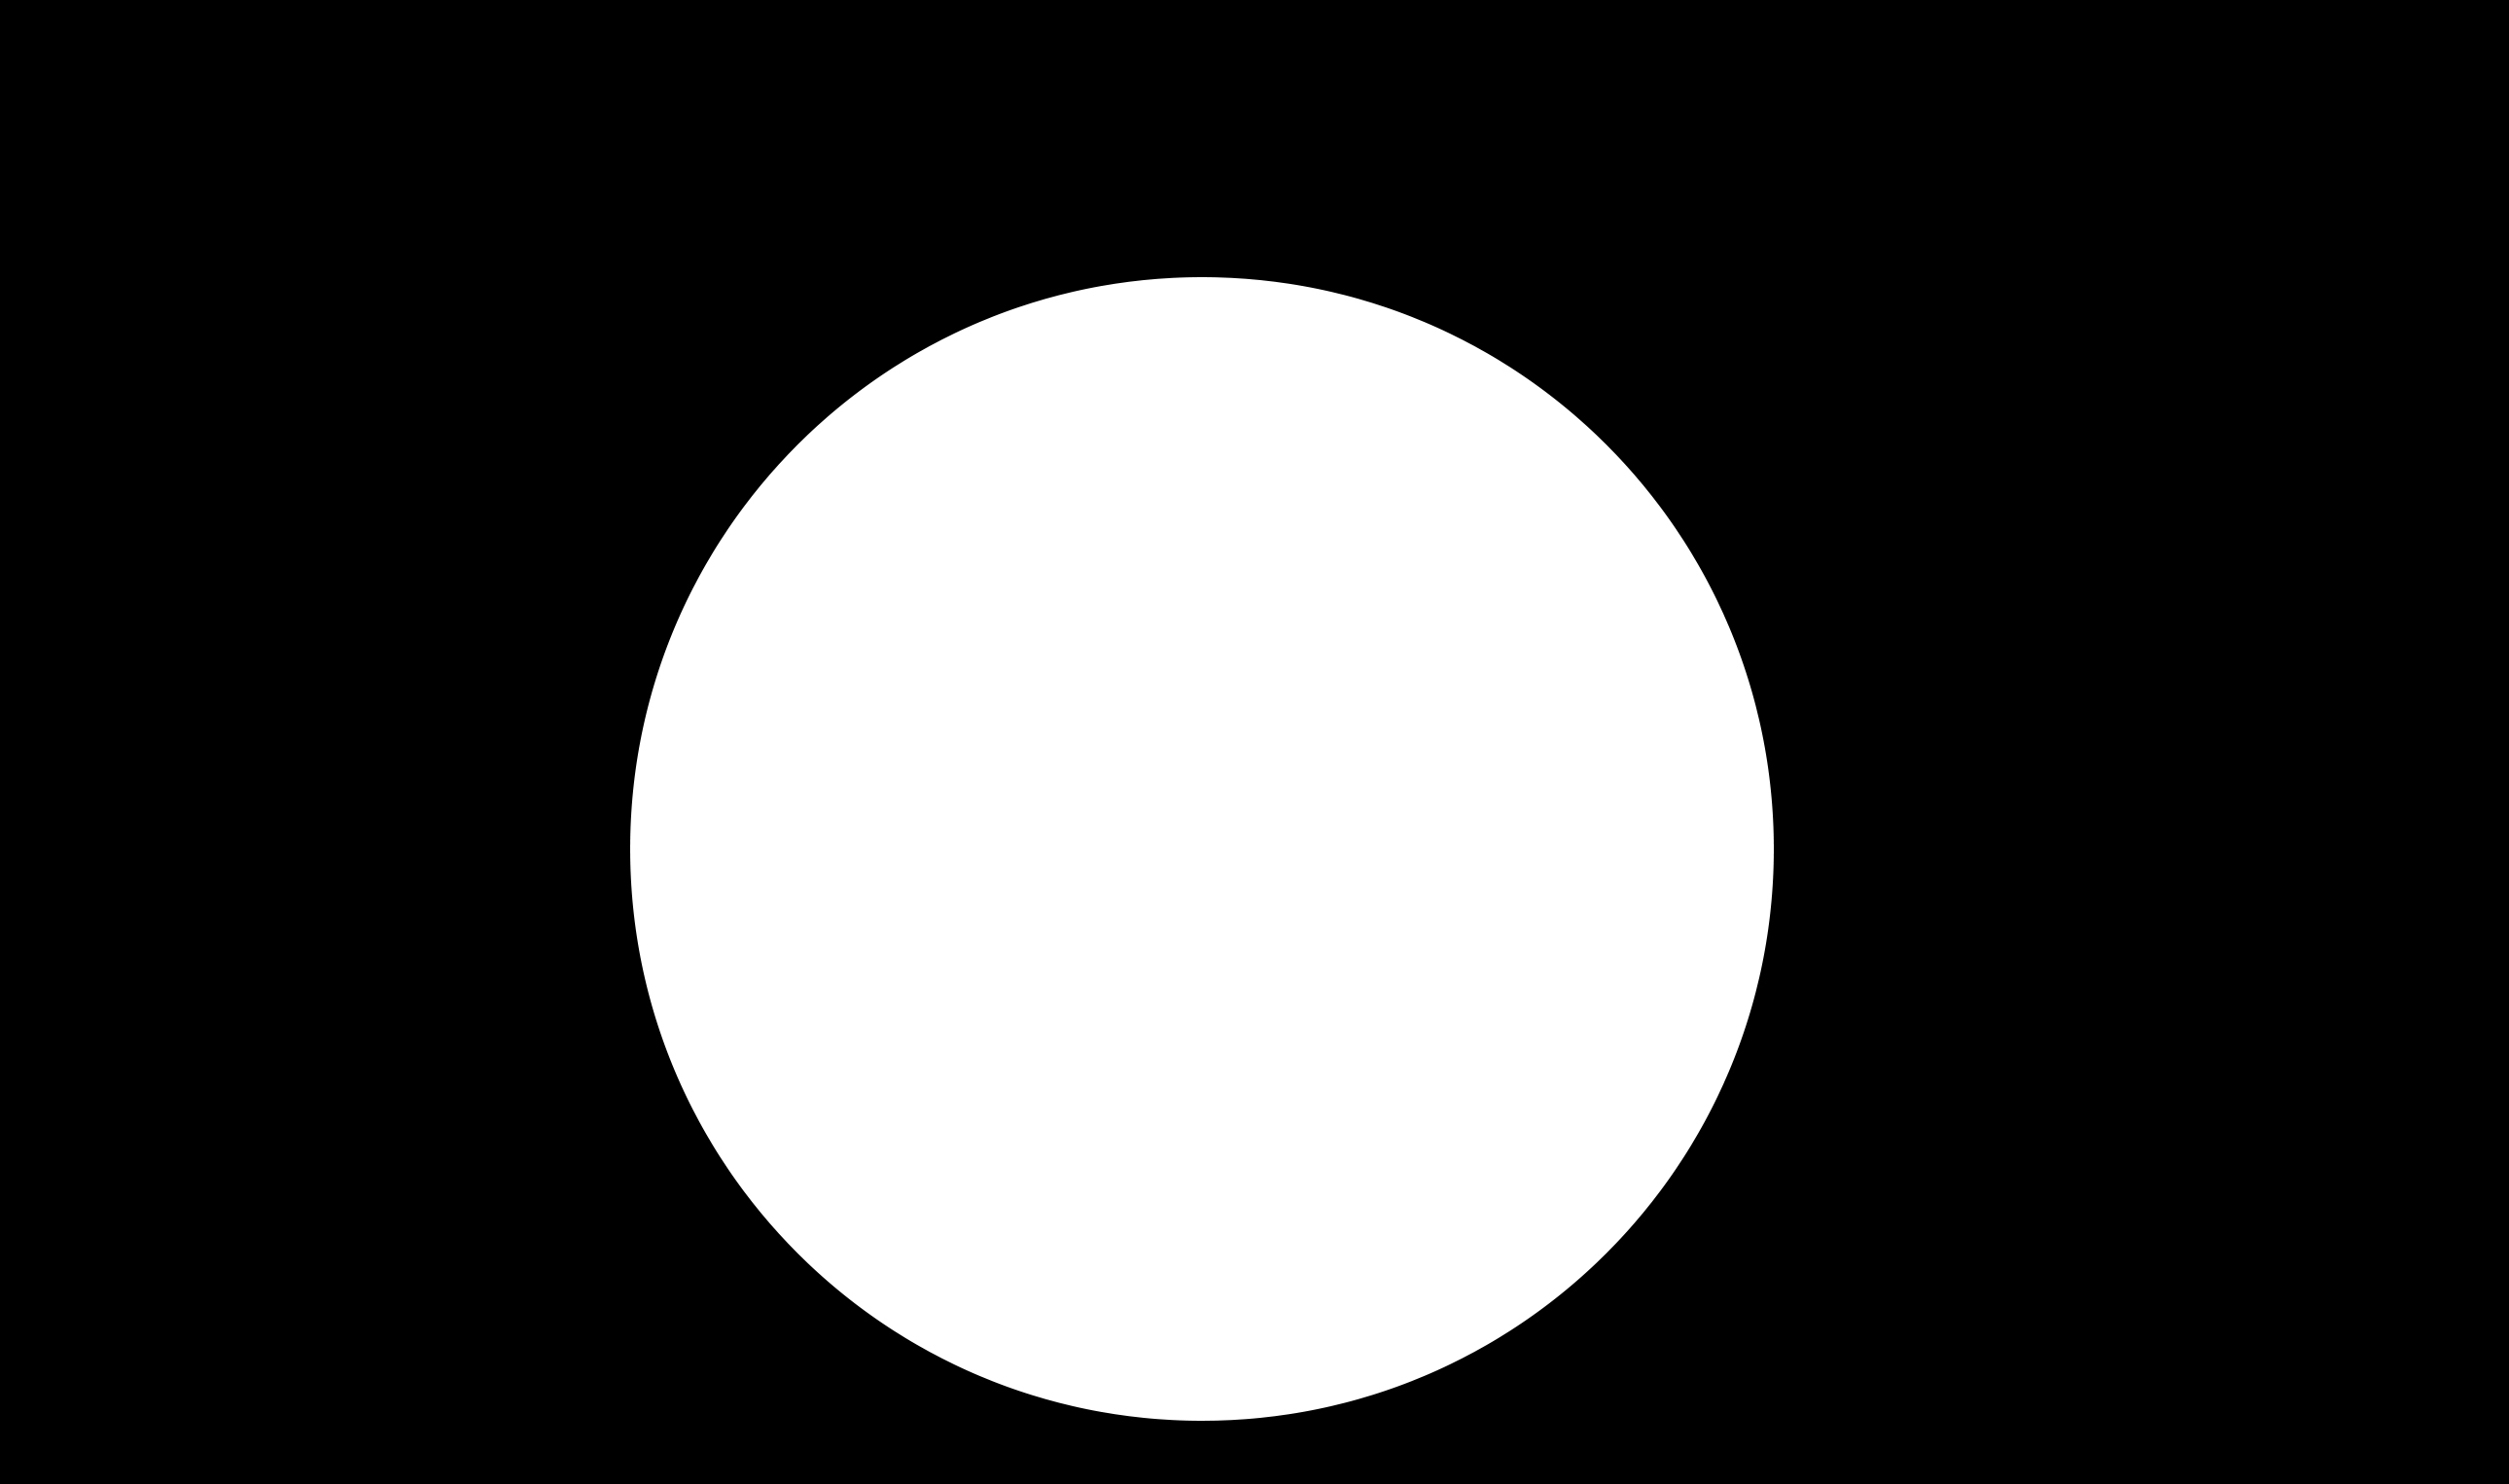

In [15]:
# Misal mask yang bisa kita buat untuk gambar diatas adalah seperti berikut 
Image("assets/example_vid_frame_mask.jpg")

In [27]:
citra_omni = cv2.imread("assets/example_vid_frame.png")
mask_omni = cv2.imread("assets/example_vid_frame_mask.jpg", cv2.IMREAD_GRAYSCALE)
result = citra_omni.copy()

result = cv2.bitwise_and(result, citra_omni, mask=mask_omni)

plt.imshow(result)

Perhatikan bahwa diluar roi (Region of interest), kita berwarna hitam, dalam pemrosesan nanti kita dapat mengabaikan semua piksel yang berwana hitam pekat dan meningkatkan efisiensi dari pengolahan citra

# Chapter 2.2 - Drawing

Sebuah citra dapat kita modifikasi sedemikian rupa sehingga cocok untuk digunakan dalam aplikasi pengolahan citra, mulai dari preprocessing, feature extraction, hingga menambahkan piksel kedalam gambar

Dapat dibayangkan misal kita memiliki citra asal, setelah dilakukan suatu pemrosesan ditemukan beberapa objek didalam gambar tersebut dan kita ingin memvisualisasikan objek tadi langsung di citra, untuk melakukannya kita mungkin bisa menuliskan teks ke citra, menggambar persegi (Bounding box) atau lingkaran di citra

Berikut adalah beberapa fungsi dari `opencv` yang dapat kita gunakan untuk mengubah citra. Misal kita akan melakukan anotasi ke gambar citra omni robot seperti berikut

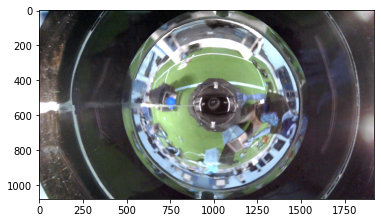

In [52]:
raw = cv2.imread("./sample/robot_ball.jpg")
plt.imshow(raw)

#### Circle

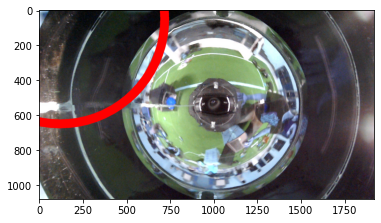

In [53]:
image_source = raw.copy()
center_coordinates = (120, 50) # Kordinat (x, y) di citra, dengan (0,0) ada di pojok kiri atas
radius = 600 # Besar dari lingkaran
color = (255, 0, 0) # Warna lingkaran*
thickness = 50 # Tebal dari garis lingkaran **

isi_lingkaran = cv2.circle(image_source, center_coordinates, radius, color, thickness)
plt.imshow(isi_lingkaran)

* OpenCV dan Matplotlib memiliki convensi yang berbeda dalam menghandle warna, dimana Matplotlib mempergunakan RGB sedangkan OpenCV mempergunakan BGR
** Thickness dapat diganti dengan -1 apabila lingkaran yang dibuat ingin dibuat ingin di 'fill' seperti berikut

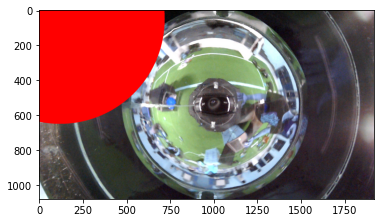

In [54]:
image_source = raw.copy()
center_coordinates = (120, 50) # Kordinat (x, y) di citra, dengan (0,0) ada di pojok kiri atas
radius = 600 # Besar dari lingkaran
color = (255, 0, 0) # Warna lingkaran*
thickness = -1 # Tebal dari garis lingkaran **

isi_lingkaran = cv2.circle(image_source, center_coordinates, radius, color, thickness)
plt.imshow(isi_lingkaran)

#### Rect

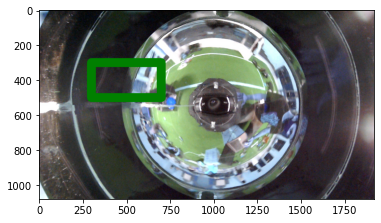

In [60]:
image_source = raw.copy()
start_point = (300, 300) # Kordinat (x, y) di citra, dengan (0,0) ada di pojok kiri atas
end_point = (700, 500)
color = (0, 128, 0)
thickness = 50 # Atau -1 untuk filled

isi_persegi = cv2.rectangle(image_source, start_point, end_point, color, thickness)
plt.imshow(isi_persegi)

Ada dua cara merepresentasikan sebuah rectangle, yaitu menentukan dua titik pojok kiri atas dan pojok kanan bawah dari persegi (Yang digunakan oleh opencv), dan dengan menentukan pojok kiri atas serta tinggi dan lebar lingkaran

#### Text

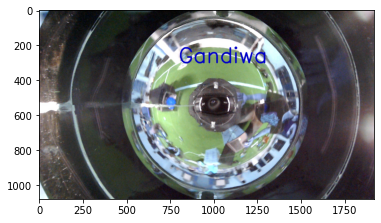

In [78]:
image_source = raw.copy()
font = cv2.FONT_HERSHEY_SIMPLEX # Font yang tersedia terbatas di opencv
fontScale = 4
origin_point = (800, 300) # Kordinat (x, y) di citra, dengan (0,0) ada di pojok kiri atas, origin dari teks juga ada di kiri atas
color = (0, 0, 200)
thickness = 7

isi_teks = cv2.putText(image_source, 'Gandiwa', origin_point, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
plt.imshow(isi_teks)

# Chapter 2.3 - Color Space

Sebuah informasi dapat direpresentasikan dengan cara berbeda, dan tergantung representasinya dapat menonjolkan suatu fakta yang berbeda

Misalkan angka 256 dapat direpresentasikan dengan berbagai cara seperti berikut

__Desimal Base 10__ => 256

__Tertulis__ => Dua ratus lima puluh enam

__Base 2__ => 10000000


Desimal Base 10 menonjolkan informasi yang berguna untuk manusia, dimana manusia dilatih untuk melakukan kalkulasi matematika dari bentuk representasi ini

Bentuk tertulis menonjolkan perbedaan, misal 256 (Dua ratus lima puluh enam) dan 206 (Dua ratus enam) memiliki perbedaan 1 digit di desimal, tetapi beda 1 kata di bentuk tertulis. Bentuk tertulis sangat berguna untuk angka besar dimana perbedaan 1 digit dapat menyebabkan efek yang berbahaya (Misalkan nilai di raport, atau jumlah tarik tunai di bank). Apakah angka 23948217567839128123 dan 2394821767839128123 sama atau berbeda?

Bentuk base 2 (Binary) berguna untuk melakukan kalkulasi mempergunakan komputer. Untuk mengilustrasikannya, misal kita diminta untuk menentukan apakah suatu angka habis dibagi 2 atau tidak. 10000000 habis dibagi 2 karena hanya ada 1 digit 1, sedangkan 10000001 tidak habis dibagi 2 karena jumlah digit 1 lebih dari 1

Sama seperti contoh diatas, tergantung bagaimana kita merepresentasikan suatu informasi, sebuah fakta akan ditonjolkan dari bentuk representasi itu, begitu juga untuk sebuah citra

__RGB__ Citra RGB berguna untuk cahaya aditif, misal bagaimana menentukan tingkat kecerahan 3 led untuk menghasilkan warna tertentu

__CMYK__ Representasi warna ini berguna untuk citra substraktif, misal untuk menentukan jumlah pigmen yang digunakan untuk menghasilkan warna di printer

__HSV__ Representasi ini berguna untuk mengemulasi bagaimana manusia melihat warna

Warna merah dapat direpresentasikan dengan beberapa cara, misal sebagai berikut

rgb(255,0,0)

cmyk(0,0,0,100)

hsv(0,100,100)

Perhatikan bahwa ketiga warna diatas akan menghasilkan warna merah yang sama, tapi direpresentasikan secara berbeda tergantung konteks dan keperluan

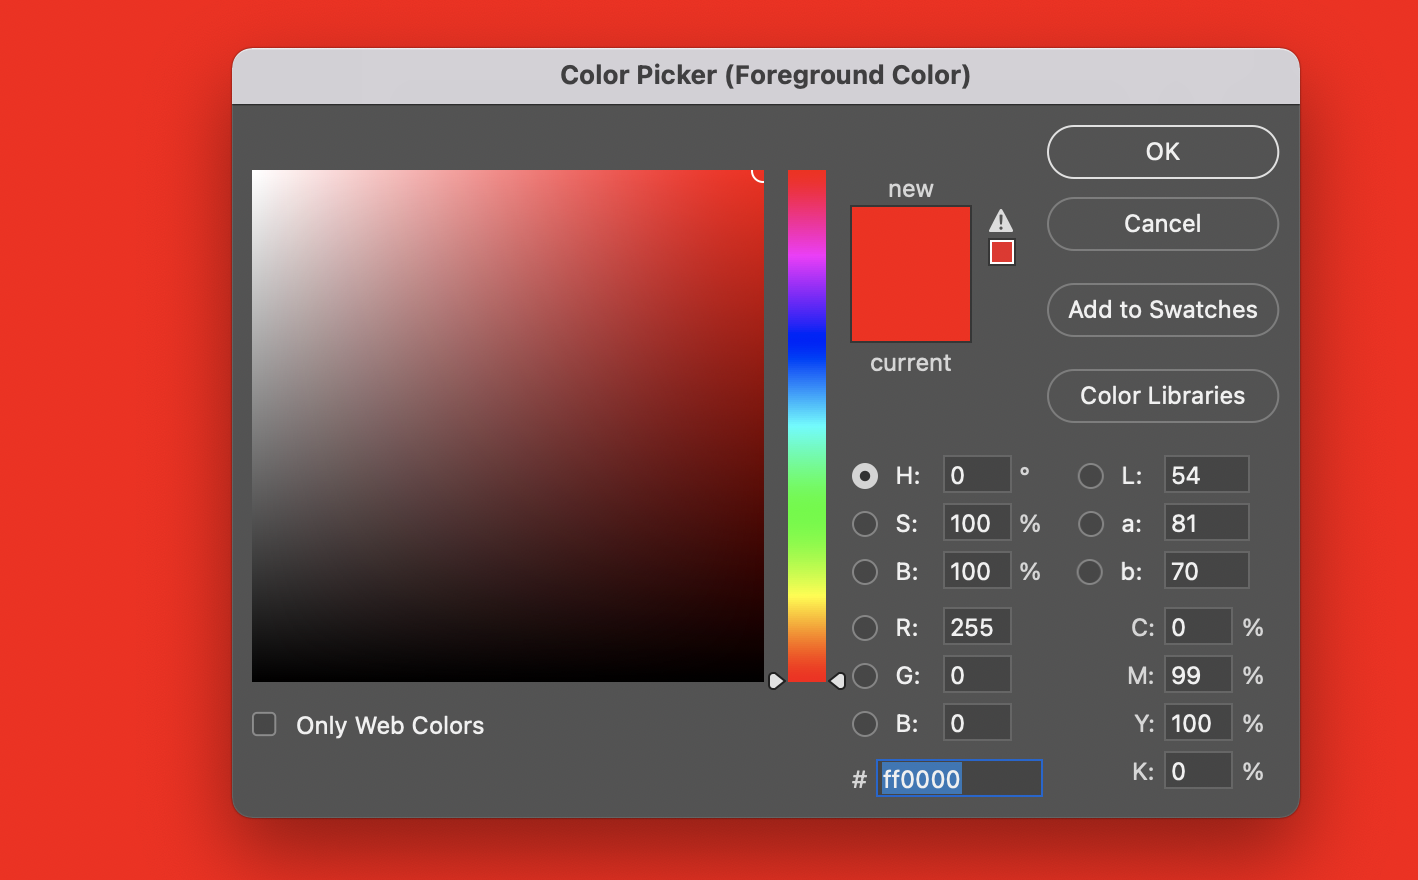

In [98]:
Image("assets/red_repr.png")

Color space yang akan kita bahas adalah HSV karena aturan dari lomba yang melibatkan Computer Vision biasanya diatur seperti berikut.

Misal aturan lomba KRSBI memiliki klausa "Bola berwarna oranye", dimana oranye yang dimaksud adalah warna oranye yang dilihat oleh manusia, warna oranye yang tidak konkret dan berubah-ubah tergantung lingkungan (Ingat kasus dress warna white-gold atau biru-hitam?)

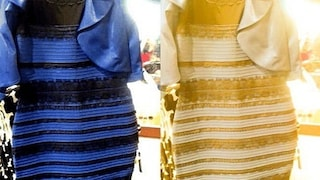

In [101]:
Image('assets/two-dresses.jpg')

RGB merepresentasikan jumlah cahaya merah, hijau dan biru dari suatu warna, sedangkan HSV merepresentasikan Hue (Warna), Saturasi (Kepekatan), Value (Cahaya)

Perhatikan bahwa aturan "Bola berwarna oranye", kata oranye direpresentasikan oleh 1 field di HSV yaitu Hue, sedangkan oleh 3 field di RGB

Perhatikan ilustrasi dua warna 'oranye' berikut

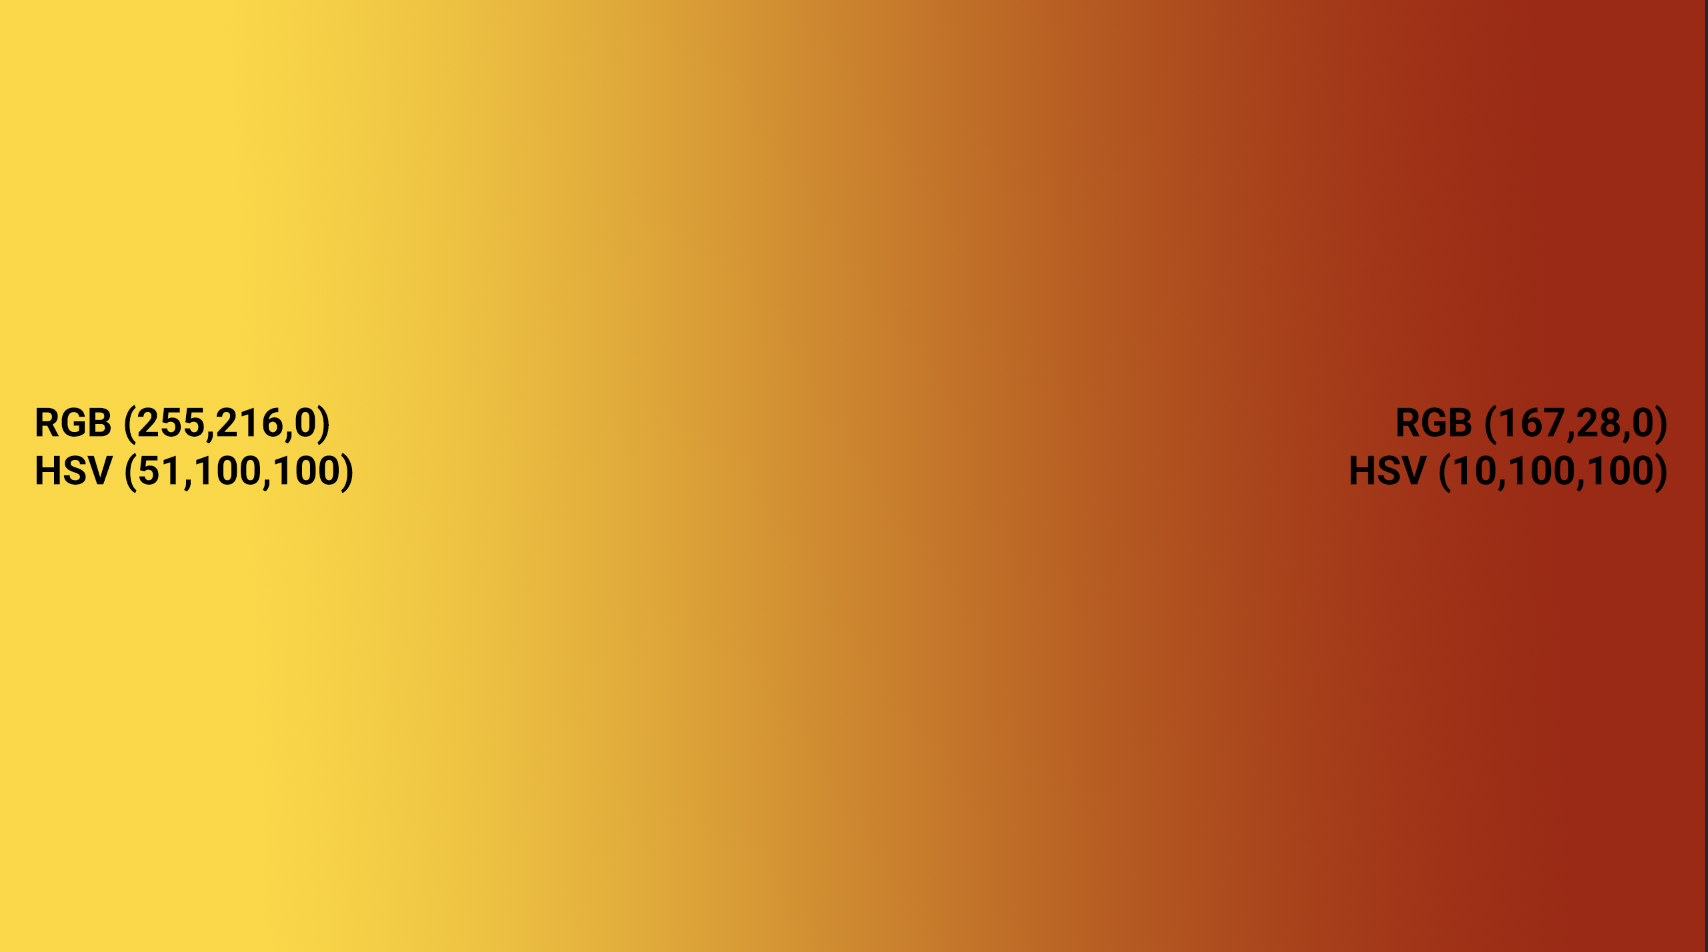

In [103]:
Image('assets/hsv_example.png')

Perhatikan bahwa warna oranye kekuningan dan oranye kemerahan direpresentasikan dengan sangat berbeda di RGB, sedangkan di HSV direpresentasikan dengan mirip

Berikut adalah color space dari HSV, nilai H direpresentasikan di axis horizontal, semakin kekiri nilai H semakin kecil, semakin kekanan nilai H semakin maksimal

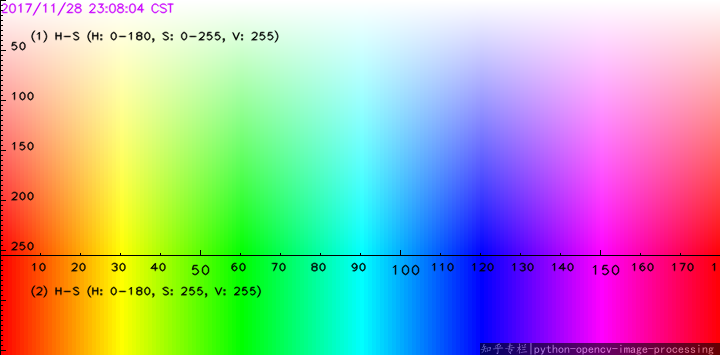

In [104]:
Image('assets/hsv_space.png')

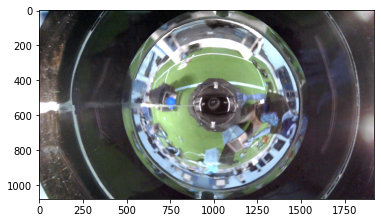

In [110]:
# Untuk mengubah citra BGR yang dibaca oleh OpenCV menjadi HSV dapat dilakukan dengan mudah seperti berikut

# Pertama baca gambar secara biasa (BGR)
bgr_img = cv2.imread(img_path)
plt.imshow(bgr_img)

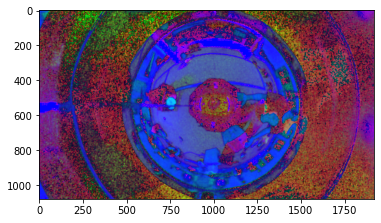

In [109]:
# Ubah format dari BGR menjadi HSV)
hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)

Kenapa aneh? Bisa dilihat bahwa citra atas (RGB) dan HSV (Bawah) terlihat jauh berbeda, padahal seharusnya gambarnya adalah sama kan?

Hal ini terjadi karena plt.imshow berasumsi bahwa gambar yang kita tampilkan memiliki format RGB, tetapi kita mengirimkan gambar HSV sehingga Matplotlib menampilkan gambar yang salah. 

Misalkan angka 10011 memiliki ambigu, apakah sepuluh ribu sebelas (Representasi desimal), atau sembilan belas (Representasi binary)? Secara umum kamu akan berasumsi bahwa angka yang digunakan di kehidupan sehari-hari adalah desimal, Matplotlib memiliki asumsi yang sama seperti itu

Untuk mengilustrasikan, mari kita lihat nilai piksel paling pojok kiri atas (Di kordinat 0,0)

In [115]:
bgr_img[0,0,:]

array([207, 242, 252], dtype=uint8)

In [116]:
hsv_img[0,0,:]

array([ 23,  46, 252], dtype=uint8)

Dapat dilihat bahwa citra BGR dan HSV sama-sama memiliki dimensi 3, kedua nilai diatas merepresentasikan warna yang sama. Kita akan memanfaatkan fitur dari HSV untuk menentukan lokasi bola pada chapter selanjutnya

Baca lebih lanjut:

https://github.com/hariangr/HsvRangeTool

https://www.youtube.com/watch?v=mmebr5PGbqo